In [1]:
import pandas as pd

combined_source_df = pd.read_csv('../data/02_processed/combined_source_df.csv')

In [2]:
combined_source_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15712 entries, 0 to 15711
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Posición                 15712 non-null  int64  
 1   Llegada                  15712 non-null  object 
 2   Salida                   15712 non-null  object 
 3   Apartamento              15712 non-null  object 
 4   Portal de reserva        15712 non-null  object 
 5   Creado                   15712 non-null  object 
 6   Dirección                0 non-null      float64
 7   Adultos                  13268 non-null  float64
 8   Niños                    2922 non-null   float64
 9   Check-in                 10953 non-null  object 
 10  Check-out                10855 non-null  object 
 11  Notas                    13440 non-null  object 
 12  Precio                   14243 non-null  float64
 13  Detalles de precios      12649 non-null  object 
 14  Comisión incluida     

In [3]:
print(combined_source_df[['Creado', 'Check-in', 'Check-out', 'Llegada', 'Salida']].head())

           Creado Check-in Check-out   Llegada    Salida
0  31.12.22 21:56    16:00     11:00  31.12.22  01.01.23
1  31.12.22 21:56    16:00     11:00  31.12.22  01.01.23
2  31.12.22 21:56    16:00     11:00  31.12.22  01.01.23
3  31.12.22 21:55      NaN       NaN  31.12.22  01.01.23
4  30.12.22 22:03    16:00     11:00  30.12.22  31.12.22


In [4]:
#Identificamos fechas con dtypes Objects y actualizamos a Datetime
combined_source_df['Check-in'] = pd.to_datetime(combined_source_df['Check-in'],format=('%H:%M'))
combined_source_df['Check-out'] = pd.to_datetime(combined_source_df['Check-out'],format=('%H:%M'))
combined_source_df['Creado'] = pd.to_datetime(combined_source_df['Creado'])
combined_source_df['Llegada'] = pd.to_datetime(combined_source_df['Llegada'])
combined_source_df['Salida'] = pd.to_datetime(combined_source_df['Salida'])
combined_source_df.info()

#df['fecha'] = pd.to_datetime(df['fecha'], format='%Y-%m-%d')

/tmp/ipykernel_173145/3696615962.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_source_df['Creado'] = pd.to_datetime(combined_source_df['Creado'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15712 entries, 0 to 15711
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Posición                 15712 non-null  int64         
 1   Llegada                  15712 non-null  datetime64[ns]
 2   Salida                   15712 non-null  datetime64[ns]
 3   Apartamento              15712 non-null  object        
 4   Portal de reserva        15712 non-null  object        
 5   Creado                   15712 non-null  datetime64[ns]
 6   Dirección                0 non-null      float64       
 7   Adultos                  13268 non-null  float64       
 8   Niños                    2922 non-null   float64       
 9   Check-in                 10953 non-null  datetime64[ns]
 10  Check-out                10855 non-null  datetime64[ns]
 11  Notas                    13440 non-null  object        
 12  Precio                   14243 n

/tmp/ipykernel_173145/3696615962.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_source_df['Llegada'] = pd.to_datetime(combined_source_df['Llegada'])
/tmp/ipykernel_173145/3696615962.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_source_df['Salida'] = pd.to_datetime(combined_source_df['Salida'])


In [5]:
# Extraer solo la parte de la hora
combined_source_df['Check-in'] = combined_source_df['Check-in'].dt.strftime('%H:%M')
combined_source_df['Check-out'] = combined_source_df['Check-out'].dt.strftime('%H:%M')

![VALORES FALTANTES](VALORES_FALTANTES.png)


Vemos que las variables *Dirección*, *City tax*, *Pago por adelantado* y *Nota de Colaboradores* no tienen ninguna observación informada-
> VAMOS A ELIMINARLAS

In [6]:

# Eliminar la columna 'Dirección'
combined_source_df_cleaned = combined_source_df.drop(['Dirección', 'City tax', 'Pago por adelantado','Nota para colaboradores'], axis=1)

# Mostrar el DataFrame resultante
print(combined_source_df_cleaned)


       Posición    Llegada     Salida      Apartamento  \
0      32518147 2022-12-31 2023-01-01        HD OLIVIA   
1      32518144 2022-12-31 2023-01-01         HD FIDEL   
2      32518120 2022-12-31 2023-01-01     HD ALEJANDRA   
3      32518117 2022-12-31 2023-01-01     H BMA LISBOA   
4      32489530 2022-12-30 2022-12-31        HD OLIVIA   
...         ...        ...        ...              ...   
15707  48020365 2024-06-17 2024-06-21       H - BUA 3P   
15708  46670629 2024-11-02 2024-12-02  H BMA AMSTERDAM   
15709  46642321 2024-12-01 2024-01-14     H BMA BERLIN   
15710  46642318 2024-12-01 2024-01-14  H BMA AMSTERDAM   
15711  45005552 2024-08-01 2024-10-01      HG0 MUGARRA   

             Portal de reserva              Creado  Adultos  Niños Check-in  \
0      Cerrar fechas (bloqueo) 2022-12-31 21:56:00      NaN    NaN    16:00   
1      Cerrar fechas (bloqueo) 2022-12-31 21:56:00      NaN    NaN    16:00   
2      Cerrar fechas (bloqueo) 2022-12-31 21:56:00      NaN    NaN

In [7]:
condicion = combined_source_df_cleaned['Portal de reserva'] == 'Cerrar fechas (bloqueo)'
combined_source_df_cleaned[condicion] 

,Posición,Llegada,Salida,Apartamento,Portal de reserva,Creado,Adultos,Niños,Check-in,Check-out,...,Precio,Detalles de precios,Comisión incluida,Pagado,Adelanto ya pagado,Número de noches,Estado,Huésped_Token,Teléfono_Token,Email_Token
0,32518147,2022-12-31,2023-01-01,HD OLIVIA,Cerrar fechas (bloqueo),2022-12-31 21:56:00,NaN,NaN,16:00,11:00,...,NaN,NaN,NaN,No,No,1,Reservado,6fc28e3d-cbc6-465d-8622-33f2fa024fa2,f76fa18f-a80a-4018-bba9-2011617a7cd7,11c1b963-9241-4b79-8ee0-c0edca3afe71
1,32518144,2022-12-31,2023-01-01,HD FIDEL,Cerrar fechas (bloqueo),2022-12-31 21:56:00,NaN,NaN,16:00,11:00,...,NaN,NaN,NaN,No,No,1,Reservado,91669750-5dc9-403e-9ab8-9e426a7a2fae,14c0dc12-9645-4fce-b3df-887206276fd3,fa715409-47c1-44d9-a26c-2a41d4dfc5f6
2,32518120,2022-12-31,2023-01-01,HD ALEJANDRA,Cerrar fechas (bloqueo),2022-12-31 21:56:00,NaN,NaN,16:00,11:00,...,NaN,NaN,NaN,No,No,1,Reservado,5bd69b7a-c906-475a-af7a-c87f7bc822d0,dab59d9a-1fa4-4bd4-95bb-c835d999f258,d58d5473-e5bf-4109-9b27-a69600c1496b
3,32518117,2022-12-31,2023-01-01,H BMA LISBOA,Cerrar fechas (bloqueo),2022-12-31 21:55:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,No,No,1,Reservado,c35e96a2-6782-43da-8e98-628a11bce3e4,03544630-3b72-4f75-93a0-b9af77c42884,bf34f53b-ced8-479f-8a90-9df608660a67
4,32489530,2022-12-30,2022-12-31,HD OLIVIA,Cerrar fechas (bloqueo),2022-12-30 22:03:00,NaN,NaN,16:00,11:00,...,NaN,NaN,NaN,No,No,1,Reservado,70187f19-844d-4b1f-8fcc-75ffa4af2d1d,b323dee6-83f9-4f17-8339-c61807eb70b9,25fa2176-393c-4a2e-af3b-4140a436173a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15495,51533765,2024-09-01,2024-11-01,HD BRUNO,Cerrar fechas (bloqueo),2024-06-01 13:43:00,NaN,NaN,16:00,11:00,...,NaN,NaN,NaN,No,No,2,Cancelado,f17a6d58-5e64-40d8-a702-3df4aa9bb1e3,5c0c4fc3-ceb2-48ba-9e93-d314d201593a,12a9f261-7c5f-4a64-b249-8c4c8062ce64
15496,51533711,2024-07-01,2024-09-01,HD ALEJANDRA,Cerrar fechas (bloqueo),2024-06-01 13:43:00,NaN,NaN,16:00,11:00,...,NaN,NaN,NaN,No,No,2,Cancelado,9332f4d4-d296-48e2-afde-6d5d0bb3b516,4f9e3ccb-7eec-4f3f-b4bc-750f9fc60380,6479f35e-36e4-4dc0-bb47-833f66f07bd0
15531,51405551,2024-12-01,2024-01-13,H - BUA 3P,Cerrar fechas (bloqueo),2024-04-01 11:23:00,NaN,NaN,16:00,11:00,...,NaN,NaN,NaN,No,No,1,Cancelado,2609273a-78df-43e4-830f-8272af749903,574cb9b8-4729-45b4-b33f-7cacfe7238e7,7177a303-a862-456c-9b9f-a3cd40cf0067
15532,51405221,2024-11-01,2024-12-01,H - BUA 3P,Cerrar fechas (bloqueo),2024-04-01 11:19:00,NaN,NaN,16:00,11:00,...,NaN,NaN,NaN,No,No,1,Reservado,9799c90f-392c-4db4-87f5-f4b690004ddf,cbedf453-29e4-40ea-98fe-096e27fc7bc4,88a5b320-04d6-4c9b-a7bc-e5ad54fbc83c


En este caso, Vemos que las variables *Portal de reserva*está fatal informada cuando el origen de la reserva es un bloqueo interno de esos apartamentos.
> VAMOS A ELIMINARLAS ESAS FILAS

In [8]:
# Eliminar las filas donde 'Portal de reservas' es 'Cerrar fechas (bloqueo)'
condicion2 = combined_source_df_cleaned['Portal de reserva'] != 'Cerrar fechas (bloqueo)'
combined_source_df_cleaned[condicion2] 

,Posición,Llegada,Salida,Apartamento,Portal de reserva,Creado,Adultos,Niños,Check-in,Check-out,...,Precio,Detalles de precios,Comisión incluida,Pagado,Adelanto ya pagado,Número de noches,Estado,Huésped_Token,Teléfono_Token,Email_Token
13,32474470,2022-12-30,2023-01-01,H BMA MONACO,Booking.com,2022-12-30 15:16:00,1.0,1.0,NaN,NaN,...,234.90,TVA - EUR 21.35,35.23,Sí,No,2,Reservado,be87b7b4-734b-475a-aedc-b80420360db2,e0c4f0b2-b56a-47ba-acb8-f6a35e572a76,8f5e9611-e2d7-4299-b5cd-8ffa3780cc21
15,32470780,2022-12-30,2022-12-31,H BMA HELSINKI,Booking.com,2022-12-30 13:38:00,2.0,NaN,NaN,NaN,...,95.00,TVA - EUR 8.64,14.25,Sí,No,1,Reservado,35e44167-2433-4876-b49b-a4545f1f7838,415c6f96-47af-404d-aa92-720fc0218919,513be7e2-5acb-40f1-994d-8b5b71755b3d
16,32469028,2022-12-31,2023-04-01,H BMA GARAJE,Reserva directa,2022-12-30 12:50:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,No,No,4,Reservado,70ff5a50-0a69-4d29-92fa-35f8bcd313ce,04b5ec55-5cca-40c6-a8b9-581bf924760d,9dee6dd7-56a4-407d-900d-38568195a5a5
17,32407618,2022-12-31,2023-01-01,H BMA DUBLIN,Booking.com,2022-12-28 20:36:00,4.0,NaN,NaN,NaN,...,245.00,TVA - EUR 22.27,36.75,Sí,No,1,Reservado,36ce4d92-6974-4f4d-be07-64ca05a4d878,0a952103-56e5-4232-876f-eba3826afb24,81c733f5-6f95-42db-a4ff-6d569ff29ee0
18,32401555,2022-12-28,2022-12-30,HD-GARAJE 5,Reserva directa,2022-12-28 18:20:00,NaN,NaN,NaN,NaN,...,40.00,NaN,NaN,No,No,2,Reservado,5ea7bfa0-4a1a-471a-bbfd-c8ab3d45306b,adcea205-d9d3-45f5-84df-c636276779c2,deb8b9cf-d436-405c-884e-890910c45722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15707,48020365,2024-06-17,2024-06-21,H - BUA 3P,Reserva directa,2023-10-23 12:17:00,1.0,NaN,16:00,11:00,...,520.00,NaN,NaN,No,No,4,Reservado,3f799401-19e1-42e6-bef4-fb4ea4ea89ea,aa1f4b17-0bc4-4b9b-a997-34607ef59b96,dc47a9ec-df04-470b-bad7-f77be13f4f44
15708,46670629,2024-11-02,2024-12-02,H BMA AMSTERDAM,Booking.com,2023-09-26 14:51:00,7.0,NaN,16:00,11:00,...,159.25,TVA - EUR 14.48,23.89,Sí,No,1,Cancelado,9e67d79d-6df1-4eb0-bb8f-ab6c4d6b8f35,8d2598f6-09a7-45b6-b6df-56f31168bd6a,80331c7b-6d26-4173-83ab-bd0ef9cab8f2
15709,46642321,2024-12-01,2024-01-14,H BMA BERLIN,Booking.com,2023-09-25 23:26:00,6.0,NaN,16:00,11:00,...,521.60,TVA - EUR 47.42,78.24,Sí,No,2,Cancelado,eb94c289-3eee-433c-9966-b16fdb114ddd,707e7188-43ba-4a80-b705-5efc1e895e66,0b46585e-a500-4cdc-9f54-e4017a1d8ec5
15710,46642318,2024-12-01,2024-01-14,H BMA AMSTERDAM,Booking.com,2023-09-25 23:26:00,5.0,NaN,16:00,11:00,...,671.80,TVA - EUR 61.07,100.77,Sí,No,2,Cancelado,5e5b0b39-996b-4856-b0c6-4ce853e664af,3c361138-e3ee-408e-bbfc-5e093f84fd9b,3bfa3195-68fa-4d88-bd73-5c14c41e88ef


In [9]:
combined_source_df_cleaned = combined_source_df_cleaned[condicion2] 
combined_source_df_cleaned

,Posición,Llegada,Salida,Apartamento,Portal de reserva,Creado,Adultos,Niños,Check-in,Check-out,...,Precio,Detalles de precios,Comisión incluida,Pagado,Adelanto ya pagado,Número de noches,Estado,Huésped_Token,Teléfono_Token,Email_Token
13,32474470,2022-12-30,2023-01-01,H BMA MONACO,Booking.com,2022-12-30 15:16:00,1.0,1.0,NaN,NaN,...,234.90,TVA - EUR 21.35,35.23,Sí,No,2,Reservado,be87b7b4-734b-475a-aedc-b80420360db2,e0c4f0b2-b56a-47ba-acb8-f6a35e572a76,8f5e9611-e2d7-4299-b5cd-8ffa3780cc21
15,32470780,2022-12-30,2022-12-31,H BMA HELSINKI,Booking.com,2022-12-30 13:38:00,2.0,NaN,NaN,NaN,...,95.00,TVA - EUR 8.64,14.25,Sí,No,1,Reservado,35e44167-2433-4876-b49b-a4545f1f7838,415c6f96-47af-404d-aa92-720fc0218919,513be7e2-5acb-40f1-994d-8b5b71755b3d
16,32469028,2022-12-31,2023-04-01,H BMA GARAJE,Reserva directa,2022-12-30 12:50:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,No,No,4,Reservado,70ff5a50-0a69-4d29-92fa-35f8bcd313ce,04b5ec55-5cca-40c6-a8b9-581bf924760d,9dee6dd7-56a4-407d-900d-38568195a5a5
17,32407618,2022-12-31,2023-01-01,H BMA DUBLIN,Booking.com,2022-12-28 20:36:00,4.0,NaN,NaN,NaN,...,245.00,TVA - EUR 22.27,36.75,Sí,No,1,Reservado,36ce4d92-6974-4f4d-be07-64ca05a4d878,0a952103-56e5-4232-876f-eba3826afb24,81c733f5-6f95-42db-a4ff-6d569ff29ee0
18,32401555,2022-12-28,2022-12-30,HD-GARAJE 5,Reserva directa,2022-12-28 18:20:00,NaN,NaN,NaN,NaN,...,40.00,NaN,NaN,No,No,2,Reservado,5ea7bfa0-4a1a-471a-bbfd-c8ab3d45306b,adcea205-d9d3-45f5-84df-c636276779c2,deb8b9cf-d436-405c-884e-890910c45722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15707,48020365,2024-06-17,2024-06-21,H - BUA 3P,Reserva directa,2023-10-23 12:17:00,1.0,NaN,16:00,11:00,...,520.00,NaN,NaN,No,No,4,Reservado,3f799401-19e1-42e6-bef4-fb4ea4ea89ea,aa1f4b17-0bc4-4b9b-a997-34607ef59b96,dc47a9ec-df04-470b-bad7-f77be13f4f44
15708,46670629,2024-11-02,2024-12-02,H BMA AMSTERDAM,Booking.com,2023-09-26 14:51:00,7.0,NaN,16:00,11:00,...,159.25,TVA - EUR 14.48,23.89,Sí,No,1,Cancelado,9e67d79d-6df1-4eb0-bb8f-ab6c4d6b8f35,8d2598f6-09a7-45b6-b6df-56f31168bd6a,80331c7b-6d26-4173-83ab-bd0ef9cab8f2
15709,46642321,2024-12-01,2024-01-14,H BMA BERLIN,Booking.com,2023-09-25 23:26:00,6.0,NaN,16:00,11:00,...,521.60,TVA - EUR 47.42,78.24,Sí,No,2,Cancelado,eb94c289-3eee-433c-9966-b16fdb114ddd,707e7188-43ba-4a80-b705-5efc1e895e66,0b46585e-a500-4cdc-9f54-e4017a1d8ec5
15710,46642318,2024-12-01,2024-01-14,H BMA AMSTERDAM,Booking.com,2023-09-25 23:26:00,5.0,NaN,16:00,11:00,...,671.80,TVA - EUR 61.07,100.77,Sí,No,2,Cancelado,5e5b0b39-996b-4856-b0c6-4ce853e664af,3c361138-e3ee-408e-bbfc-5e093f84fd9b,3bfa3195-68fa-4d88-bd73-5c14c41e88ef


In [10]:
combined_source_df_cleaned['Portal de reserva'].unique()

array(['Booking.com', 'Reserva directa', 'Airbnb', 'Página web'],
      dtype=object)

In [11]:
combined_source_df = pd.DataFrame(combined_source_df)

condicion3 = combined_source_df_cleaned['Comisión incluida'].isnull()
combined_source_df_cleaned.loc[condicion3, 'Comisión incluida'] = 0

In [12]:

# Mostrar el DataFrame actualizado
print("\nDataFrame después de ajustar la Comisión incluida:")
print(combined_source_df_cleaned)


DataFrame después de ajustar la Comisión incluida:
       Posición    Llegada     Salida      Apartamento Portal de reserva  \
13     32474470 2022-12-30 2023-01-01     H BMA MONACO       Booking.com   
15     32470780 2022-12-30 2022-12-31   H BMA HELSINKI       Booking.com   
16     32469028 2022-12-31 2023-04-01     H BMA GARAJE   Reserva directa   
17     32407618 2022-12-31 2023-01-01     H BMA DUBLIN       Booking.com   
18     32401555 2022-12-28 2022-12-30      HD-GARAJE 5   Reserva directa   
...         ...        ...        ...              ...               ...   
15707  48020365 2024-06-17 2024-06-21       H - BUA 3P   Reserva directa   
15708  46670629 2024-11-02 2024-12-02  H BMA AMSTERDAM       Booking.com   
15709  46642321 2024-12-01 2024-01-14     H BMA BERLIN       Booking.com   
15710  46642318 2024-12-01 2024-01-14  H BMA AMSTERDAM       Booking.com   
15711  45005552 2024-08-01 2024-10-01      HG0 MUGARRA            Airbnb   

                   Creado  Adultos 

In [13]:
combined_source_df_cleaned['Comisión incluida'].isna()

13       False
15       False
16       False
17       False
18       False
         ...  
15707    False
15708    False
15709    False
15710    False
15711    False
Name: Comisión incluida, Length: 14386, dtype: bool

In [14]:
combined_source_df_cleaned['Comisión incluida'].info()


<class 'pandas.core.series.Series'>
Index: 14386 entries, 13 to 15711
Series name: Comisión incluida
Non-Null Count  Dtype  
--------------  -----  
14386 non-null  float64
dtypes: float64(1)
memory usage: 224.8 KB


In [15]:
combined_source_df_cleaned

,Posición,Llegada,Salida,Apartamento,Portal de reserva,Creado,Adultos,Niños,Check-in,Check-out,...,Precio,Detalles de precios,Comisión incluida,Pagado,Adelanto ya pagado,Número de noches,Estado,Huésped_Token,Teléfono_Token,Email_Token
13,32474470,2022-12-30,2023-01-01,H BMA MONACO,Booking.com,2022-12-30 15:16:00,1.0,1.0,NaN,NaN,...,234.90,TVA - EUR 21.35,35.23,Sí,No,2,Reservado,be87b7b4-734b-475a-aedc-b80420360db2,e0c4f0b2-b56a-47ba-acb8-f6a35e572a76,8f5e9611-e2d7-4299-b5cd-8ffa3780cc21
15,32470780,2022-12-30,2022-12-31,H BMA HELSINKI,Booking.com,2022-12-30 13:38:00,2.0,NaN,NaN,NaN,...,95.00,TVA - EUR 8.64,14.25,Sí,No,1,Reservado,35e44167-2433-4876-b49b-a4545f1f7838,415c6f96-47af-404d-aa92-720fc0218919,513be7e2-5acb-40f1-994d-8b5b71755b3d
16,32469028,2022-12-31,2023-04-01,H BMA GARAJE,Reserva directa,2022-12-30 12:50:00,NaN,NaN,NaN,NaN,...,NaN,NaN,0.00,No,No,4,Reservado,70ff5a50-0a69-4d29-92fa-35f8bcd313ce,04b5ec55-5cca-40c6-a8b9-581bf924760d,9dee6dd7-56a4-407d-900d-38568195a5a5
17,32407618,2022-12-31,2023-01-01,H BMA DUBLIN,Booking.com,2022-12-28 20:36:00,4.0,NaN,NaN,NaN,...,245.00,TVA - EUR 22.27,36.75,Sí,No,1,Reservado,36ce4d92-6974-4f4d-be07-64ca05a4d878,0a952103-56e5-4232-876f-eba3826afb24,81c733f5-6f95-42db-a4ff-6d569ff29ee0
18,32401555,2022-12-28,2022-12-30,HD-GARAJE 5,Reserva directa,2022-12-28 18:20:00,NaN,NaN,NaN,NaN,...,40.00,NaN,0.00,No,No,2,Reservado,5ea7bfa0-4a1a-471a-bbfd-c8ab3d45306b,adcea205-d9d3-45f5-84df-c636276779c2,deb8b9cf-d436-405c-884e-890910c45722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15707,48020365,2024-06-17,2024-06-21,H - BUA 3P,Reserva directa,2023-10-23 12:17:00,1.0,NaN,16:00,11:00,...,520.00,NaN,0.00,No,No,4,Reservado,3f799401-19e1-42e6-bef4-fb4ea4ea89ea,aa1f4b17-0bc4-4b9b-a997-34607ef59b96,dc47a9ec-df04-470b-bad7-f77be13f4f44
15708,46670629,2024-11-02,2024-12-02,H BMA AMSTERDAM,Booking.com,2023-09-26 14:51:00,7.0,NaN,16:00,11:00,...,159.25,TVA - EUR 14.48,23.89,Sí,No,1,Cancelado,9e67d79d-6df1-4eb0-bb8f-ab6c4d6b8f35,8d2598f6-09a7-45b6-b6df-56f31168bd6a,80331c7b-6d26-4173-83ab-bd0ef9cab8f2
15709,46642321,2024-12-01,2024-01-14,H BMA BERLIN,Booking.com,2023-09-25 23:26:00,6.0,NaN,16:00,11:00,...,521.60,TVA - EUR 47.42,78.24,Sí,No,2,Cancelado,eb94c289-3eee-433c-9966-b16fdb114ddd,707e7188-43ba-4a80-b705-5efc1e895e66,0b46585e-a500-4cdc-9f54-e4017a1d8ec5
15710,46642318,2024-12-01,2024-01-14,H BMA AMSTERDAM,Booking.com,2023-09-25 23:26:00,5.0,NaN,16:00,11:00,...,671.80,TVA - EUR 61.07,100.77,Sí,No,2,Cancelado,5e5b0b39-996b-4856-b0c6-4ce853e664af,3c361138-e3ee-408e-bbfc-5e093f84fd9b,3bfa3195-68fa-4d88-bd73-5c14c41e88ef


In [16]:
combined_source_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14386 entries, 13 to 15711
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Posición             14386 non-null  int64         
 1   Llegada              14386 non-null  datetime64[ns]
 2   Salida               14386 non-null  datetime64[ns]
 3   Apartamento          14386 non-null  object        
 4   Portal de reserva    14386 non-null  object        
 5   Creado               14386 non-null  datetime64[ns]
 6   Adultos              13267 non-null  float64       
 7   Niños                2922 non-null   float64       
 8   Check-in             10065 non-null  object        
 9   Check-out            9967 non-null   object        
 10  Notas                13423 non-null  object        
 11  Precio               14241 non-null  float64       
 12  Detalles de precios  12649 non-null  object        
 13  Comisión incluida    14386 non-null

In [17]:
combined_source_df_cleaned.describe()


,Posición,Llegada,Salida,Creado,Adultos,Niños,Precio,Comisión incluida,Número de noches
count,1.438600e+04,14386,14386,14386,13267.000000,2922.000000,14241.000000,14386.000000,14386.000000
mean,4.270972e+07,2023-07-05 08:10:40.622828032,2023-07-07 08:12:46.745446912,2023-06-27 03:10:42.328652800,2.644456,1.761807,230.438834,30.834147,1.828792
min,1.539014e+07,2021-12-19 00:00:00,2022-01-02 00:00:00,2021-02-12 11:22:00,1.000000,1.000000,1.150000,0.000000,1.000000
25%,2.997241e+07,2022-11-06 00:00:00,2022-11-07 00:00:00,2022-10-27 11:09:30,2.000000,1.000000,81.900000,10.650000,1.000000
50%,4.228362e+07,2023-07-20 00:00:00,2023-07-24 00:00:00,2023-07-05 19:36:00,2.000000,2.000000,148.000000,20.250000,1.000000
75%,5.427418e+07,2024-03-14 00:00:00,2024-03-17 00:00:00,2024-02-26 21:46:30,3.000000,2.000000,272.000000,38.240000,2.000000
max,6.985467e+07,2024-12-11 00:00:00,2024-12-08 00:00:00,2024-12-08 23:16:00,8.000000,7.000000,7847.600000,867.750000,91.000000
std,1.447137e+07,NaN,NaN,NaN,1.370796,0.719993,292.345751,37.945631,2.098335


En este caso, Vemos que las variables *Notas* está informada con muca información entre ellas 'Numero de reserva', 'Mensaje de Cliente', 'Mensaje de Booking', si es Genius o no.
> VAMOS A EXTRAER ESA informacion a nuevas columnas

In [18]:
print(combined_source_df_cleaned['Notas'].head(1000))

13      Número de reserva: 3509184945\nMensaje del hué...
15      Número de reserva: 3677697588\nMensaje del hué...
16                                                    NaN
17      Número de reserva: 2331981900\nMensaje del hué...
18                                           Trjeta 28.12
                              ...                        
1210    Número de reserva: 3768511260\nMensaje del hué...
1211    Número de reserva: HMNDEZMPEH\nIdioma del hués...
1212    Número de reserva: HMQX24ANFK\nIdioma del hués...
1213    Número de reserva: 2894245314\nMensaje del hué...
1214    Número de reserva: 3040511008\nMensaje del hué...
Name: Notas, Length: 1000, dtype: object


In [19]:
# Extraer el número después de 'Mensaje del huésped:'
combined_source_df_cleaned['Numero_Reserva'] = combined_source_df_cleaned['Notas'].str.extract(r'Número de reserva: (\d+)')
# Extraer el texto después de 'Mensaje del huésped:'
combined_source_df_cleaned['Mensaje_Huesped'] = combined_source_df_cleaned['Notas'].str.extract(r'Mensaje del huésped:\s*(.*)\s*BOOKING NOTE:')
# Extraer el texto después de 'BOOKING NOTE:'
combined_source_df_cleaned['BOOKING_NOTE'] = combined_source_df_cleaned['Notas'].str.extract(r'BOOKING NOTE\s*:\s*(.*)')

combined_source_df_cleaned[['BOOKING_NOTE', 'Mensaje_Huesped']] = combined_source_df_cleaned['BOOKING_NOTE'].str.extract(r'(Payment charge is EUR \d+\.\d+)\s*(.*)')

# Crear la nueva columna 'GENIUS' que sea True si 'booker_is_genius' está en 'Texto'
combined_source_df_cleaned['GENIUS'] = combined_source_df_cleaned['Notas'].str.contains('booker_is_genius', case=False, na=False)

# Mostrar el DataFrame modificado
print("\nDataFrame modificado:")
print(combined_source_df_cleaned[['Numero_Reserva','BOOKING_NOTE','Mensaje_Huesped','GENIUS']])

combined_source_df_cleaned.info()


DataFrame modificado:
      Numero_Reserva                   BOOKING_NOTE Mensaje_Huesped  GENIUS
13        3509184945   Payment charge is EUR 2.5839                    True
15        3677697588    Payment charge is EUR 1.045                    True
16               NaN                            NaN             NaN   False
17        2331981900    Payment charge is EUR 2.695                    True
18               NaN                            NaN             NaN   False
...              ...                            ...             ...     ...
15707            NaN                            NaN             NaN   False
15708     4232587055  Payment charge is EUR 1.75175                    True
15709     4237415932  Payment charge is EUR 13.1274                    True
15710     4237415932  Payment charge is EUR 13.1274                    True
15711            NaN                            NaN             NaN   False

[14386 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>
I

In [20]:
#Comprobamos la extracción de datos del campo Notas del original
# Mostrar el DataFrame modificado de una reserva al azar (linea 100)
print("\nDataFrame NO modificado:")
print(combined_source_df_cleaned['Notas'][999])
print("\nNuevas columnas:")
print("\nBooking Note:")
print(combined_source_df_cleaned['BOOKING_NOTE'][999])
print("\nNumero_Reserva:")
print(combined_source_df_cleaned['Numero_Reserva'][999])
print("\nMensaje del Huesped:")
print(combined_source_df_cleaned['Mensaje_Huesped'][999])
print('\nGENIUS:')
print(combined_source_df_cleaned['GENIUS'][999])


DataFrame NO modificado:
Número de reserva: 3880677067
Mensaje del huésped: ** THIS RESERVATION HAS BEEN PRE-PAID **
BOOKING NOTE : Payment charge is EUR 1.122

Más información: booker_is_genius
Pago por adelantado: 102.00EUR

Nuevas columnas:

Booking Note:
Payment charge is EUR 1.122

Numero_Reserva:
3880677067

Mensaje del Huesped:


GENIUS:
True


In [21]:
# Mostrar los valores únicos en la columna 'Pagado'
print(combined_source_df_cleaned['Pagado'].unique())
# Convertir la columna booleana 'Pagado' a tipo objeto (texto)
combined_source_df_cleaned['Pagado'] = combined_source_df_cleaned['Pagado'].astype(str)
print(combined_source_df_cleaned['Pagado'].head())

['Sí' 'No']
13    Sí
15    Sí
16    No
17    Sí
18    No
Name: Pagado, dtype: object


# NUMERO DE HUÉSPEDES

Creamos una columna "Numero de Huéspedes" sumando los adultos y los niños.
Me aseguro de que los valores nulos (NaN) en 'Adultos' y 'Niños' sean tratados correctamente antes de la suma.
Los reemplazamos con 0 si es necesario.

In [22]:
# Creamos una columna "Numero de Huéspedes" sumando los adultos y los niños.
# Me aseguro de que los valores nulos (NaN) en 'Adultos' y 'Niños' sean tratados correctamente antes de la suma.
# Los reemplazamos con 0 si es necesario.

combined_source_df_cleaned['Adultos'].fillna(0, inplace=True)
combined_source_df_cleaned['Niños'].fillna(0, inplace=True)

# Crear la nueva columna 'Numero_Clientes' sumando 'Adultos' y 'Niños'
combined_source_df_cleaned['Numero_Huespedes'] = combined_source_df_cleaned['Adultos'] + combined_source_df_cleaned['Niños']

/tmp/ipykernel_173145/683601818.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_source_df_cleaned['Adultos'].fillna(0, inplace=True)
/tmp/ipykernel_173145/683601818.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

# LEAD TIME

Creamos una columna "Lead Time" restando la fecha de reserva 'Creado' y la fecha de entrad 'Llegada'.

In [23]:

# Crear la nueva columna 'Lead_Time' restando 'Creado' menos 'Llegada'
combined_source_df_cleaned['Lead_Time'] = combined_source_df_cleaned['Creado'] - combined_source_df_cleaned['Llegada']
combined_source_df_cleaned['Lead_Time'].describe()

count                          14386
mean     -9 days +19:00:01.705825108
std       94 days 08:38:44.117280607
min              -433 days +23:26:00
25%               -33 days +01:04:00
50%                -2 days +09:43:30
75%                  0 days 15:48:00
max                334 days 12:44:00
Name: Lead_Time, dtype: object

# PRECIO DIARIO - DAILY RATE

Quiero crear una nueva columna 'ADR' que se calcule en base al 'Precio' dividido entre la columna de 'Número de Noches'

In [24]:
# Verifica los tipos de datos de las columnas
print(combined_source_df_cleaned[['Precio', 'Número de noches']].dtypes)

# Comprueba si hay valores nulos en estas columnas
print(combined_source_df_cleaned[['Precio', 'Número de noches']].isnull().sum())

Precio              float64
Número de noches      int64
dtype: object
Precio              145
Número de noches      0
dtype: int64


In [25]:
condicion4 = combined_source_df_cleaned['Precio'].isna() == True
# Filtrar las filas que cumplen con la condición
filas_a_eliminar = combined_source_df_cleaned[condicion4]

# Crear un DataFrame excluyendo las filas que cumplen la condición
combined_source_df_cleaned_sin_filas = combined_source_df_cleaned.loc[~combined_source_df_cleaned.index.isin(filas_a_eliminar.index)]

# Verifica el resultado
print(combined_source_df_cleaned_sin_filas.head())


    Posición    Llegada     Salida     Apartamento Portal de reserva  \
13  32474470 2022-12-30 2023-01-01    H BMA MONACO       Booking.com   
15  32470780 2022-12-30 2022-12-31  H BMA HELSINKI       Booking.com   
17  32407618 2022-12-31 2023-01-01    H BMA DUBLIN       Booking.com   
18  32401555 2022-12-28 2022-12-30     HD-GARAJE 5   Reserva directa   
19  32400367 2022-12-31 2023-01-01        HD DARIO       Booking.com   

                Creado  Adultos  Niños Check-in Check-out  ...     Estado  \
13 2022-12-30 15:16:00      1.0    1.0      NaN       NaN  ...  Reservado   
15 2022-12-30 13:38:00      2.0    0.0      NaN       NaN  ...  Reservado   
17 2022-12-28 20:36:00      4.0    0.0      NaN       NaN  ...  Reservado   
18 2022-12-28 18:20:00      0.0    0.0      NaN       NaN  ...  Reservado   
19 2022-12-28 17:53:00      2.0    0.0    16:00     11:00  ...  Reservado   

                           Huésped_Token  \
13  be87b7b4-734b-475a-aedc-b80420360db2   
15  35e44167-243

In [26]:
# Asegúrate de que no haya división por cero
combined_source_df_cleaned['Número de noches'] = combined_source_df_cleaned['Número de noches'].replace(0, pd.NA)

# Crear la columna 'ADR'
combined_source_df_cleaned['ADR'] = combined_source_df_cleaned['Precio'] / combined_source_df_cleaned['Número de noches']

# Opcional: Reemplazar NaN en 'ADR' si hay valores de 'Número de Noches' que eran 0
combined_source_df_cleaned['ADR'] = combined_source_df_cleaned['ADR'].fillna(0)

# Verifica el resultado
print(combined_source_df_cleaned[['Precio', 'ADR']].head())

    Precio     ADR
13   234.9  117.45
15    95.0   95.00
16     NaN    0.00
17   245.0  245.00
18    40.0   20.00


In [27]:
print(combined_source_df_cleaned['ADR'].describe())

count    14386.000000
mean       122.610006
std         83.106241
min          0.000000
25%         70.000000
50%        101.000000
75%        157.550000
max       1502.700000
Name: ADR, dtype: float64


In [28]:
# Calcular el precio medio histórico para cada 'Apartamento' y 'Llegada'
historical_avg_price = combined_source_df_cleaned.groupby(['Apartamento', 'Llegada'])['Precio'].mean().reset_index()

# Renombrar la columna del precio medio
historical_avg_price.rename(columns={'Precio': 'Precio_Medio_Historico'}, inplace=True)

# Realizar el merge con el DataFrame original
combined_source_df_cleaned = combined_source_df_cleaned.merge(
    historical_avg_price, 
    on=['Apartamento', 'Llegada'], 
    how='left',
    suffixes=('', '_historico')  # Añadir sufijo para evitar conflictos
)

In [29]:
# Calcular el precio medio histórico excluyendo la reserva actual
historical_avg_price = combined_source_df_cleaned.apply(
    lambda row: combined_source_df_cleaned[
        (combined_source_df_cleaned['Apartamento'] == row['Apartamento']) & 
        (combined_source_df_cleaned['Llegada'] < row['Llegada'])
    ]['ADR'].mean(), 
    axis=1
)

# Añadir la columna calculada al DataFrame
combined_source_df_cleaned['Precio_Medio_Historico'] = historical_avg_price


In [30]:
combined_source_df_cleaned[['Apartamento', 'Precio', 'Número de noches', 'ADR', 'Precio_Medio_Historico']]

,Apartamento,Precio,Número de noches,ADR,Precio_Medio_Historico
0,H BMA MONACO,234.90,2,117.45,110.427971
1,H BMA HELSINKI,95.00,1,95.00,111.276875
2,H BMA GARAJE,NaN,4,0.00,19.459700
3,H BMA DUBLIN,245.00,1,245.00,121.511303
4,HD-GARAJE 5,40.00,2,20.00,14.154531
...,...,...,...,...,...
14381,H - BUA 3P,520.00,4,130.00,84.024558
14382,H BMA AMSTERDAM,159.25,1,159.25,240.824767
14383,H BMA BERLIN,521.60,2,260.80,163.806629
14384,H BMA AMSTERDAM,671.80,2,335.90,241.218314


# OCUPACION del MES

Quiero crear una nueva columna 'Ocupacion' en el que se muestra el porcentaje de unidades reservadas ese día.

In [31]:
# Crear un DataFrame para las fechas ocupadas
ocupacion = pd.DataFrame()

# Generar una serie de fechas ocupadas para cada reserva
for idx, row in combined_source_df_cleaned.iterrows():
    fechas_ocupadas = pd.date_range(start=row['Llegada'], end=row['Salida'] - pd.Timedelta(days=1), freq='D')
    df_temp = pd.DataFrame({
        'Fecha': fechas_ocupadas,
        'Apartamento': row['Apartamento']
    })
    ocupacion = pd.concat([ocupacion, df_temp], ignore_index=True)

# Calcular el número total de apartamentos (únicos)
total_apartamentos = combined_source_df_cleaned['Apartamento'].nunique()

# Contar el número de apartamentos ocupados por día
ocupacion_diaria = ocupacion.groupby('Fecha')['Apartamento'].nunique().reset_index()
ocupacion_diaria.rename(columns={'Apartamento': 'Apartamentos_Ocupados'}, inplace=True)

# Calcular el porcentaje de ocupación
ocupacion_diaria['Porcentaje_Ocupacion'] = (ocupacion_diaria['Apartamentos_Ocupados'] / total_apartamentos) * 100

# Mergear con el DataFrame original si es necesario
combined_source_df_cleaned = combined_source_df_cleaned.merge(
    ocupacion_diaria, 
    left_on='Llegada', 
    right_on='Fecha', 
    how='left'
)

In [32]:
combined_source_df_cleaned[['Llegada','Apartamento', 'Precio', 'Número de noches', 'ADR', 'Precio_Medio_Historico','Porcentaje_Ocupacion']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14386 entries, 0 to 14385
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Llegada                 14386 non-null  datetime64[ns]
 1   Apartamento             14386 non-null  object        
 2   Precio                  14241 non-null  float64       
 3   Número de noches        14386 non-null  int64         
 4   ADR                     14386 non-null  float64       
 5   Precio_Medio_Historico  14345 non-null  float64       
 6   Porcentaje_Ocupacion    14353 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 786.9+ KB


In [33]:
# Eliminar filas solo si tienen valores NaN en las columnas 'Precio', 'Precio_Medio_Historico' o 'Porcentaje_Ocupacion'
combined_source_df_cleaned = combined_source_df_cleaned.dropna(subset=['Precio', 'Precio_Medio_Historico', 'Porcentaje_Ocupacion'])


# Reemplazar todos los valores de la columna 'Check-in' con '16:00'
combined_source_df_cleaned['Check-in'] = '16:00'

# Reemplazar todos los valores de la columna 'Check-out' con '11:00'
combined_source_df_cleaned['Check-out'] = '11:00'

# Verificar el resultado
print(combined_source_df_cleaned[['Check-in','Check-out']])

# Verificar el resultado
print(combined_source_df_cleaned.info())


      Check-in Check-out
0        16:00     11:00
1        16:00     11:00
3        16:00     11:00
4        16:00     11:00
5        16:00     11:00
...        ...       ...
14381    16:00     11:00
14382    16:00     11:00
14383    16:00     11:00
14384    16:00     11:00
14385    16:00     11:00

[14170 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
Index: 14170 entries, 0 to 14385
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype          
---  ------                  --------------  -----          
 0   Posición                14170 non-null  int64          
 1   Llegada                 14170 non-null  datetime64[ns] 
 2   Salida                  14170 non-null  datetime64[ns] 
 3   Apartamento             14170 non-null  object         
 4   Portal de reserva       14170 non-null  object         
 5   Creado                  14170 non-null  datetime64[ns] 
 6   Adultos                 14170 non-null  float64        
 7   Niños           

In [34]:
combined_source_df_cleaned[['Llegada','Apartamento', 'Precio', 'Número de noches', 'ADR', 'Precio_Medio_Historico','Porcentaje_Ocupacion']].head()

,Llegada,Apartamento,Precio,Número de noches,ADR,Precio_Medio_Historico,Porcentaje_Ocupacion
0,2022-12-30,H BMA MONACO,234.9,2,117.45,110.427971,29.268293
1,2022-12-30,H BMA HELSINKI,95.0,1,95.00,111.276875,29.268293
3,2022-12-31,H BMA DUBLIN,245.0,1,245.00,121.511303,39.024390
4,2022-12-28,HD-GARAJE 5,40.0,2,20.00,14.154531,51.219512
5,2022-12-31,HD DARIO,201.0,1,201.00,108.699008,39.024390


In [35]:
combined_source_df_cleaned[['Llegada','Apartamento', 'Precio', 'Número de noches', 'ADR', 'Precio_Medio_Historico','Porcentaje_Ocupacion']].describe()

,Llegada,Precio,Número de noches,ADR,Precio_Medio_Historico,Porcentaje_Ocupacion
count,14170,14170.000000,14170.000000,14170.000000,14170.000000,14170.000000
mean,2023-07-02 12:03:51.700776192,230.071982,1.816161,123.862298,114.359994,75.692549
min,2022-01-01 00:00:00,1.150000,1.000000,1.150000,10.000000,9.756098
25%,2022-11-04 00:00:00,82.000000,1.000000,71.000000,96.583300,56.097561
50%,2023-07-17 00:00:00,148.000000,1.000000,102.000000,110.495091,75.609756
75%,2024-03-07 00:00:00,272.000000,2.000000,158.333333,123.437877,97.560976
max,2024-12-07 00:00:00,7847.600000,81.000000,1502.700000,331.666667,100.000000
std,NaN,291.796386,1.950443,82.565860,41.017779,17.115534


In [36]:
combined_source_df_cleaned.describe()

,Posición,Llegada,Salida,Creado,Adultos,Niños,Precio,Comisión incluida,Número de noches,Numero_Huespedes,Lead_Time,ADR,Precio_Medio_Historico,Fecha,Apartamentos_Ocupados,Porcentaje_Ocupacion
count,1.417000e+04,14170,14170,14170,14170.000000,14170.000000,14170.000000,14170.000000,14170.000000,14170.000000,14170,14170.000000,14170.000000,14170,14170.000000,14170.000000
mean,4.253946e+07,2023-07-02 12:03:51.700776192,2023-07-04 17:40:07.960480256,2023-06-24 12:09:39.561044736,2.463726,0.360762,230.071982,31.099969,1.816161,2.824488,-8 days +00:05:47.860268173,123.862298,114.359994,2023-07-02 12:03:51.700776192,31.033945,75.692549
min,1.539014e+07,2022-01-01 00:00:00,2022-01-02 00:00:00,2021-02-12 11:22:00,0.000000,0.000000,1.150000,0.000000,1.000000,0.000000,-433 days +23:26:00,1.150000,10.000000,2022-01-01 00:00:00,4.000000,9.756098
25%,2.989671e+07,2022-11-04 00:00:00,2022-11-05 00:00:00,2022-10-25 22:17:00,2.000000,0.000000,82.000000,10.650000,1.000000,2.000000,-33 days +11:08:45,71.000000,96.583300,2022-11-04 00:00:00,23.000000,56.097561
50%,4.215626e+07,2023-07-17 00:00:00,2023-07-22 00:00:00,2023-07-03 11:11:30,2.000000,0.000000,148.000000,20.535000,1.000000,3.000000,-2 days +10:02:30,102.000000,110.495091,2023-07-17 00:00:00,31.000000,75.609756
75%,5.392231e+07,2024-03-07 00:00:00,2024-03-13 00:00:00,2024-02-22 16:19:00,3.000000,0.000000,272.000000,38.340000,2.000000,4.000000,0 days 15:49:45,158.333333,123.437877,2024-03-07 00:00:00,40.000000,97.560976
max,6.985467e+07,2024-12-07 00:00:00,2024-12-08 00:00:00,2024-12-08 23:16:00,8.000000,7.000000,7847.600000,867.750000,81.000000,8.000000,334 days 12:44:00,1502.700000,331.666667,2024-12-07 00:00:00,41.000000,100.000000
std,1.435905e+07,NaN,NaN,NaN,1.482575,0.782050,291.796386,37.941852,1.950443,1.639560,94 days 09:46:11.870985077,82.565860,41.017779,NaN,7.017369,17.115534


In [37]:
# Guardar el DataFrame en un archivo CSV en la carpeta 'data/02_processed/'
output_path = '../data/02_processed/df_final_modelar.csv'
# Guardar el DataFrame en un archivo CSV en la carpeta '02_processed/'
combined_source_df_cleaned.to_csv(output_path, index=False)

print(f"DataFrame guardado en {output_path}")


DataFrame guardado en ../data/02_processed/df_final_modelar.csv


array([[<Axes: title={'center': 'Posición'}>,
        <Axes: title={'center': 'Adultos'}>,
        <Axes: title={'center': 'Niños'}>],
       [<Axes: title={'center': 'Precio'}>,
        <Axes: title={'center': 'Comisión incluida'}>,
        <Axes: title={'center': 'Número de noches'}>],
       [<Axes: title={'center': 'Numero_Huespedes'}>,
        <Axes: title={'center': 'ADR'}>,
        <Axes: title={'center': 'Precio_Medio_Historico'}>],
       [<Axes: title={'center': 'Apartamentos_Ocupados'}>,
        <Axes: title={'center': 'Porcentaje_Ocupacion'}>, <Axes: >]],
      dtype=object)

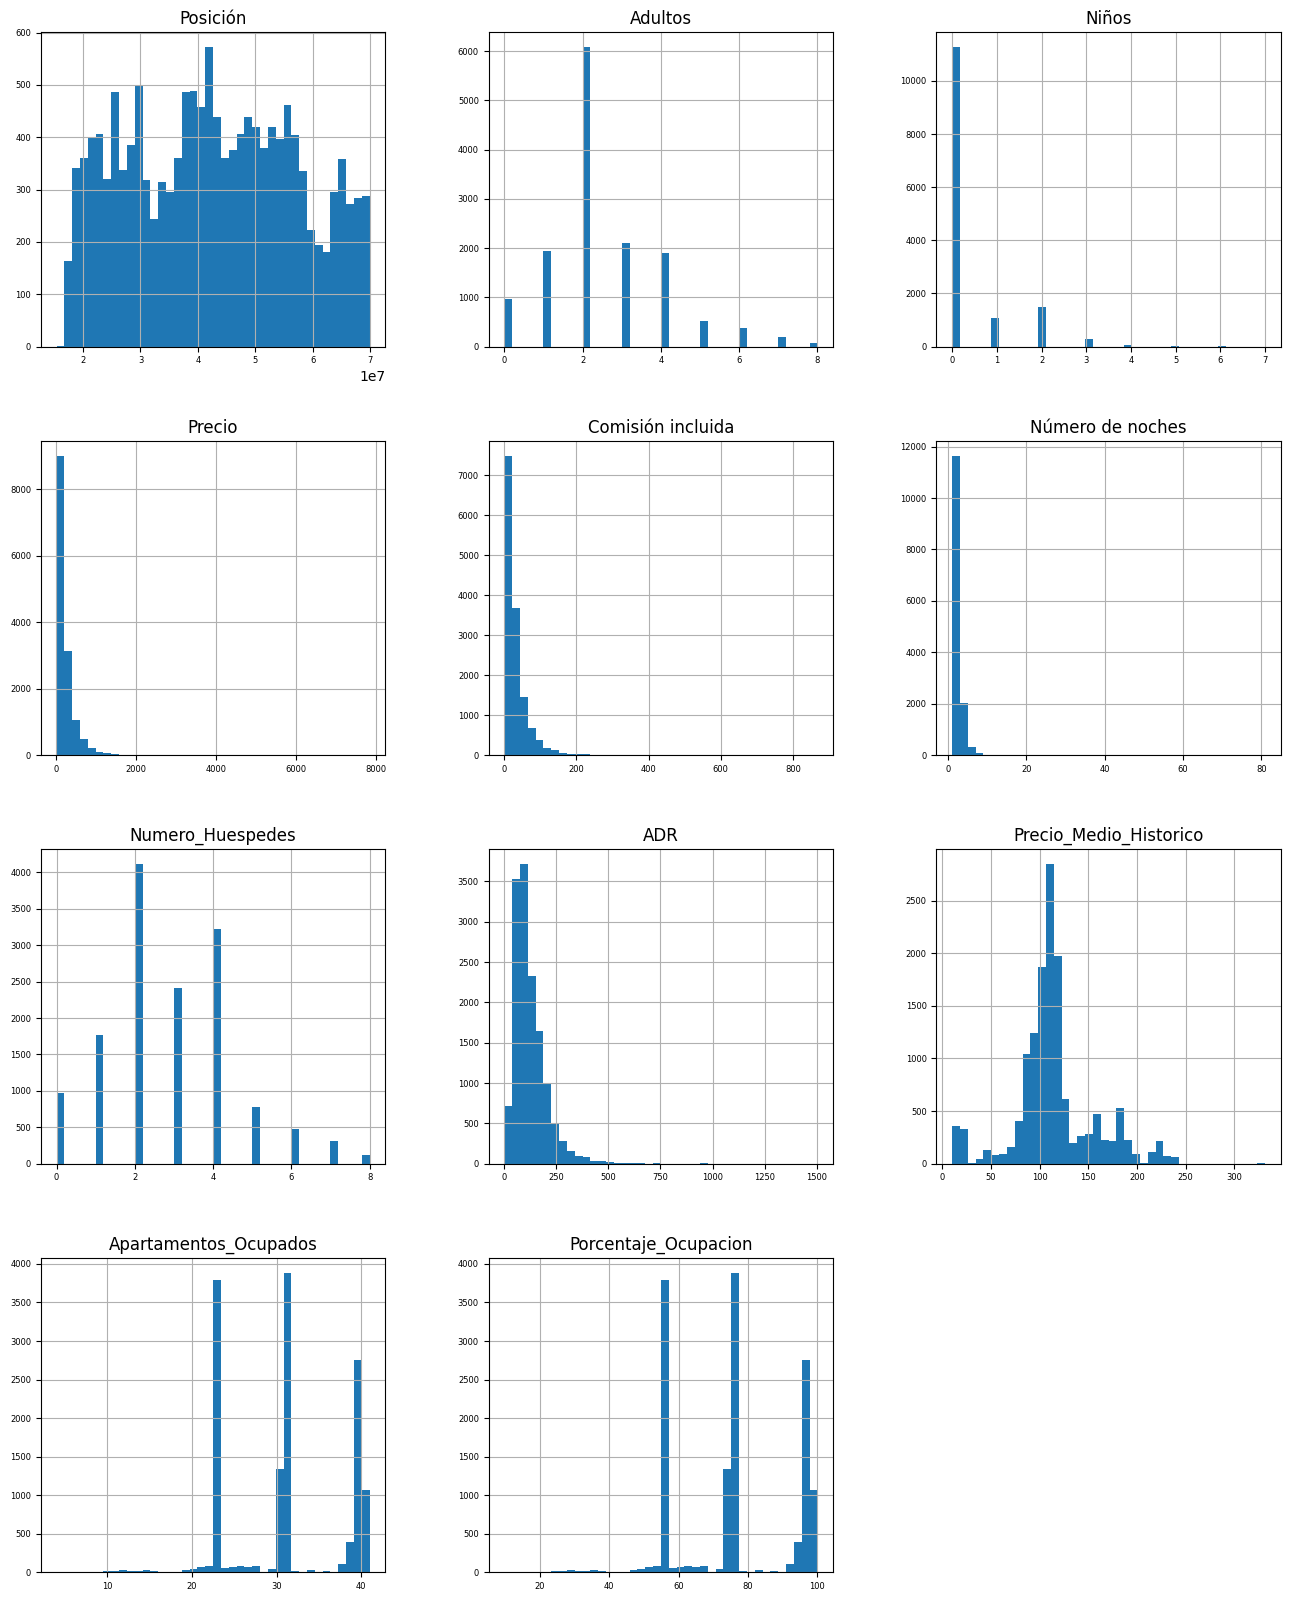

In [38]:
df_num = combined_source_df_cleaned.select_dtypes(include = ['float64', 'int64'])
df_num.hist(figsize=(16, 20), bins=40, xlabelsize=6, ylabelsize=6)

<Axes: xlabel='Número de noches', ylabel='Count'>

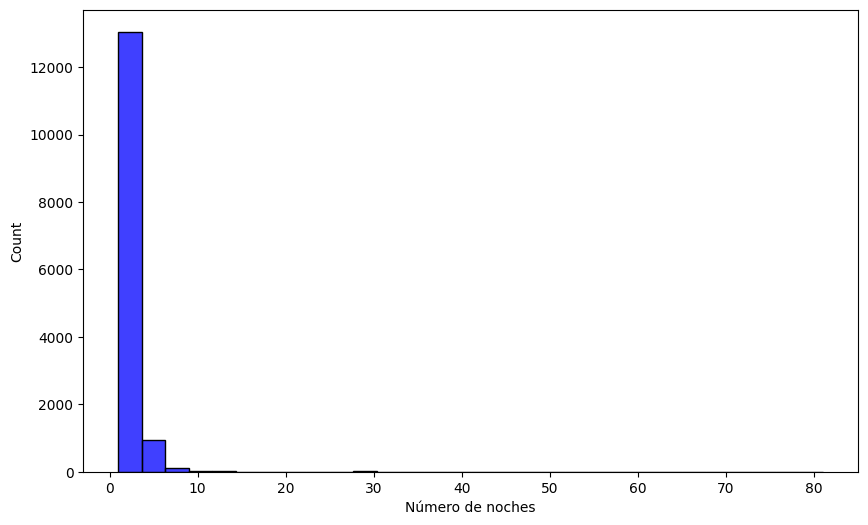

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(combined_source_df_cleaned['Número de noches'].dropna(), bins=30, kde=False, color='blue')


In [40]:
Outlier = combined_source_df_cleaned[combined_source_df_cleaned['Número de noches'] >= 360]
Outlier

,Posición,Llegada,Salida,Apartamento,Portal de reserva,Creado,Adultos,Niños,Check-in,Check-out,...,Mensaje_Huesped,BOOKING_NOTE,GENIUS,Numero_Huespedes,Lead_Time,ADR,Precio_Medio_Historico,Fecha,Apartamentos_Ocupados,Porcentaje_Ocupacion


In [41]:
from ydata_profiling import ProfileReport

# Generar el perfilado del DataFrame
profile = ProfileReport(combined_source_df_cleaned, title="Análisis Exploratorio de Datos", explorative=True)

# Intentar mostrar el informe en el notebook
try:
    profile.to_notebook_iframe()
except Exception as e:
    print(f"Error al mostrar el informe en el notebook: {e}")

# Guardar el informe en un archivo HTML
profile.to_file("analisis_eda_cleaned.html")


/home/iraitz/TheBridge/FEB24 -BIL  DS PT/PROYECTO_FINAL_ML/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Error al mostrar el informe en el notebook: No module named 'ipywidgets'


Summarize dataset:  87%|████████▋ | 34/39 [00:01<00:00, 37.78it/s, Calculate auto correlation]              /home/iraitz/TheBridge/FEB24 -BIL  DS PT/PROYECTO_FINAL_ML/.venv/lib/python3.10/site-packages/ydata_profiling/model/pandas/discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[5 5 5 ... 0 0 1]' has dtype incompatible with timedelta64[ns], please explicitly cast to a compatible dtype first.
  discretized_df.loc[:, column] = self._discretize_column(
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 101.72it/s]


Creado         datetime64[ns]
Apartamento            object
dtype: object
['HD OLIVIA' 'HD FIDEL' 'HD ALEJANDRA' 'H BMA LISBOA' 'HD HUGHET'
 'HD GLORIA' 'HD DARIO' 'HD CELESTE' 'H BMA BERLIN' 'H BMA MONACO'
 'H BMA HELSINKI' 'H BMA GARAJE' 'H BMA DUBLIN' 'HD-GARAJE 5'
 'H BMA AMSTERDAM' 'H BMA CHICAGO' 'HD ELENA' 'H - BUA GARAJE'
 'H - BUA 3P' 'H BMA PRAGA' 'H - BUA 4P' 'HD BRUNO' 'H BMA OSLO'
 'HG0 COBETAS' 'HG0 PAGASARRI' 'HG1 ARRAIZ' 'HG0 GANEKOGORTA' 'HG1 AMBOTO'
 'HG1 ARTXANDA' 'HG0 MUGARRA' 'HG0 GANETA' 'AH11 DOBLE ARIAS'
 'AH10 INDIVIDUAL ARIAS' 'AH2 DOBLE ARIAS' 'AH12 DOBLE ARIAS'
 'AH1 DOBLE ARIAS' 'AH6 INDIVIDUAL ARIAS' 'AH14 INDIVIDUAL ARIAS'
 'AH13 INDIVIDUAL ARIAS' 'AH9 DOBLE ARIAS' 'AH4 INDIVIDUAL ARIAS']


/tmp/ipykernel_173145/3645192834.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Apartamento', bbox_to_anchor=(1.05, 1), loc='upper left')


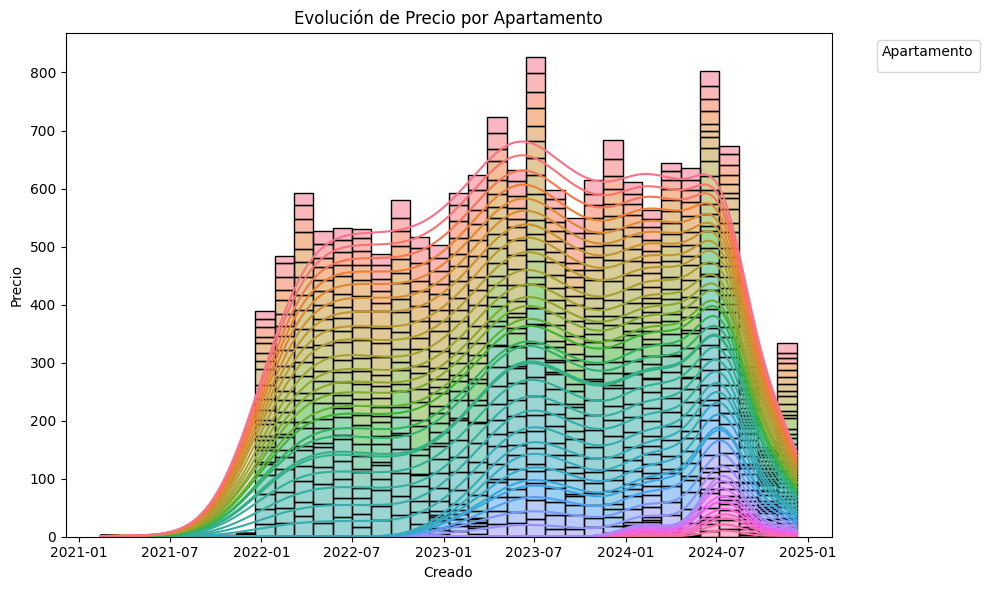

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Verifica los tipos de datos y valores únicos para asegurar que 'Apartamento' y 'Creado' sean correctos
print(combined_source_df[['Creado', 'Apartamento']].dtypes)
print(combined_source_df['Apartamento'].unique())

# Crear histograma con diferentes líneas para cada categoría
plt.figure(figsize=(10, 6))

# Verifica si 'Creado' es un datetime y si no, conviértelo
if not pd.api.types.is_datetime64_any_dtype(combined_source_df['Creado']):
    combined_source_df['Creado'] = pd.to_datetime(combined_source_df['Creado'], errors='coerce')

# Crear el histograma
sns.histplot(data=combined_source_df, x='Creado', hue='Apartamento', multiple='stack', kde=True)

# Personalizar el gráfico
plt.title('Evolución de Precio por Apartamento')
plt.xlabel('Creado')
plt.ylabel('Precio')

# Asegurarse de que la leyenda se muestra correctamente
plt.legend(title='Apartamento', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()
